In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filepath = "alldata.csv"
all_df = pd.read_csv(filepath)
all_df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
#Dropped and filled in all the NaN values because they were messing with our code later on.

all_df['reviews'] = all_df['reviews'].fillna(value=0)
all_df = all_df.dropna()
all_df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [4]:
#A lot of the values in the "location" column had single spaces at the end, which were also messing with our code.
#We slice the strings in the column by index, so the spaces messed that up.

for i in range(len(all_df)):
    if all_df.iloc[i,4][-1] == ' ':
        all_df.iloc[i,4] = all_df.iloc[i,4][:-1]

In [5]:
#Made another column separating cities and zipcodes.

all_df['zipcode'] = pd.Series({'zipcode':[]})
for i in range(len(all_df)):
    location = all_df.iloc[i,4]
    if any(char.isdigit() for char in location):
        all_df.iloc[i,5] = location[-5:]
        all_df.iloc[i,4] = location[:-6]
    else:
        all_df.iloc[i,5] = "None"

all_df.head()

,position,company,description,reviews,location,zipcode
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA",30301
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA",None
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA",None
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",30303
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",None


In [6]:
#Made a DataFrame of the different companies, tracking the number of job postings they made and the number of reviews they have.

company_df = pd.DataFrame({'Company': all_df.groupby('company').count().index,
                           'Positions': all_df.groupby('company').count()['position'],
                            'Reviews': all_df.groupby('company').mean()['reviews']})
company_df.index = [i for i in range(len(company_df))]
company_df.head()

,Company,Positions,Reviews
0,10x Genomics,1,0.0
1,1199SEIU Family of Funds,1,133.0
2,1871,1,4.0
3,23andMe,17,4.0
4,24 Hour Fitness,1,2090.0


In [7]:
#Made a DataFrame of the different job locations and their frequencies.

location_df = pd.DataFrame({'Location': all_df.groupby('location').count().index,
                       'Count': all_df.groupby('location').count()['company']})
location_df.index = [i for i in range(len(location_df))]
location_df.head()

,Location,Count
0,"Alameda, CA",10
1,"Allendale, NJ",2
2,"Atlanta, GA",269
3,"Austin, TX",213
4,"Bedminster, NJ",1


In [8]:
#Created a function to search all job descriptions for specific terms or phrases.

def wordsearch(searchterm):
    occurrences = 0
    frequency = 0
    for i in range(len(all_df)):
        if searchterm.lower() in all_df.iloc[i,2].lower():
            frequency += 1
            occurrences += all_df.iloc[i,2].lower().count(searchterm.lower())
    print(f'Total number of times "{searchterm}" occurred in job descriptions: {occurrences}')
    print(f'Total number of job descriptions containing "{searchterm}": {frequency}')    

In [9]:
wordsearch('degree')

Total number of times "degree" occurred in job descriptions: 6735
Total number of job descriptions containing "degree": 4215


In [10]:
#Created another function to search all job titles for specific terms or phrases.

def jobsearch(searchterm):
    frequency = 0
    for i in range(len(all_df)):
        if searchterm.lower() in all_df.iloc[i,0].lower():
            frequency += 1
    print(f'Total number of job titles containing "{searchterm}": {frequency}')    

In [11]:
jobsearch('research')

Total number of job titles containing "research": 1182


In [12]:
#Created a new DataFrame categorizing jobs as "Data Analyst," "Data Scientist," "Engineer," or "Misc."
#There may be overlap between categories.

type_df = pd.DataFrame({'position':[], 'company':[], 'description':[], 'reviews':[], 'location':[], 'zipcode':[], 'type':[]})

for i in range(len(all_df)):
    if 'analyst' in all_df.iloc[i,0].lower() or 'analysis' in all_df.iloc[i,0]:
        type_df = type_df.append(all_df.iloc[i])
        type_df.iloc[-1,6] = 'Data Analyst'
    if 'data scientist' in all_df.iloc[i,0].lower() or 'data science' in all_df.iloc[i,0]:
        type_df = type_df.append(all_df.iloc[i])
        type_df.iloc[-1,6] = 'Data Scientist'
    if 'engineer' in all_df.iloc[i,0].lower():
        type_df = type_df.append(all_df.iloc[i])
        type_df.iloc[-1,6] = 'Engineer'
    if 'engineer' not in all_df.iloc[i,0].lower() and 'data scientist' not in all_df.iloc[i,0].lower() and 'data science' not in all_df.iloc[i,0] and 'analyst' not in all_df.iloc[i,0].lower() and 'analysis' not in all_df.iloc[i,0]:
        type_df = type_df.append(all_df.iloc[i])
        type_df.iloc[-1,6] = 'Misc.'


In [13]:
type_df['type'].value_counts()

Misc.             3528
Engineer          1354
Data Scientist    1261
Data Analyst       885
Name: type, dtype: int64

In [14]:
#Made a separate column for the state in which the job takes place.

all_df['state'] = pd.Series()
for i in range(len(all_df)):
    state = all_df.iloc[i,4][-2:]
    all_df.iloc[i,6] = state

    
all_df.head()

,position,company,description,reviews,location,zipcode,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,0.0,"Atlanta, GA",30301,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",0.0,"Atlanta, GA",None,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",0.0,"Atlanta, GA",None,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",30303,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",None,GA


In [15]:
#Made a DataFrame for just the jobs in California.

cal_df = all_df.loc[all_df['state'] == 'CA']
cal_df.head()

,position,company,description,reviews,location,zipcode,state
2182,Institutional Review Board Analyst I - Office ...,USC,Please Note: This position is located on our H...,545.0,"Los Angeles, CA",None,CA
2183,Analyst - Optimization,The Boston Consulting Group,PRACTICE AREA:\n\nBCG's Advanced Analytics Gro...,198.0,"Los Angeles, CA",None,CA
2184,Postdoctoral Research Associate,USC,Environment and background\nOur focus at the L...,545.0,"Los Angeles, CA",None,CA
2185,Research Analyst,"SHIELDS for Families, Inc.","SUMMARY OF DUTIES:\nDeveloping, administering,...",48.0,"Los Angeles, CA",90002,CA
2186,Additive Materials and Process Scientist,Divergent 3D,Position Specification: Additive Material and ...,0.0,"Los Angeles, CA",None,CA


In [16]:
#Grouped the California jobs by city.

cal_df.groupby('location').count().sort_values('position', ascending=False).head(15)

,position,company,description,reviews,zipcode,state
location,,,,,,
"San Francisco, CA",564,564,564,564,564,564
"San Diego, CA",412,412,412,412,412,412
"Mountain View, CA",277,277,277,277,277,277
"Sunnyvale, CA",256,256,256,256,256,256
"Los Angeles, CA",254,254,254,254,254,254
"South San Francisco, CA",73,73,73,73,73,73
"Redwood City, CA",59,59,59,59,59,59
"Oakland, CA",34,34,34,34,34,34
"San Mateo, CA",30,30,30,30,30,30


In [17]:
#Grouped the California jobs by company.

cal_df.groupby('company').count().sort_values('position', ascending=False).head(15)



,position,description,reviews,location,zipcode,state
company,,,,,,
Google,96,96,96,96,96,96
Walmart eCommerce,45,45,45,45,45,45
Amazon.com,42,42,42,42,42,42
"Pharmacyclics, an Abbvie Company",34,34,34,34,34,34
Cymer,32,32,32,32,32,32
Oath Inc,31,31,31,31,31,31
Illumina,27,27,27,27,27,27
JD.com,26,26,26,26,26,26
Cedars-Sinai,24,24,24,24,24,24


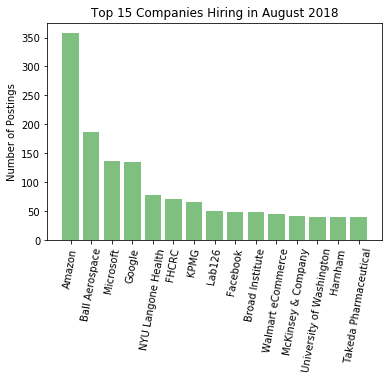

<Figure size 432x288 with 0 Axes>

In [18]:
#Create plot for company/position count 

company_x=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Company"]
company_y=company_df.sort_values("Positions", ascending=False).nlargest(15, "Positions")["Positions"]
labels = ["Amazon", "Ball Aerospace", "Microsoft", "Google", "NYU Langone Health", "FHCRC", "KPMG", 
          "Lab126", "Facebook", "Broad Institute", "Walmart eCommerce", "McKinsey & Company", "University of Washington", 
          "Harnham", "Takeda Pharmaceutical"]

colors =["dodgerblue", "green", "firebrick", "cyan", "magenta", "gold", "mediumaquamarine", "pink", "purple", "lime", "teal", "salmon", "skyblue", "orange", "lavender"]

company_df=plt.bar(labels, company_y, color="green", alpha=.5, label=labels)
plt.xticks(rotation=80)
plt.title("Top 15 Companies Hiring in August 2018")
plt.ylabel("Number of Postings")

plt.show()
plt.savefig("Images/USATopHiringCompanies.png")

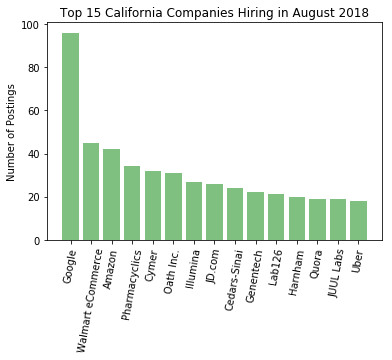

<Figure size 432x288 with 0 Axes>

In [19]:
#Create plot for company/position count in California 

cal_x= cal_df["position"]

position = [96, 45, 42, 34, 32, 31, 27, 26, 24, 22, 21, 20, 19, 19, 18]

cal_labels = ["Google", "Walmart eCommerce", "Amazon", "Pharmacyclics", "Cymer", "Oath Inc.", "Illumina", 
          "JD.com", "Cedars-Sinai", "Genentech", "Lab126", "Harnham", "Quora", 
          "JUUL Labs", "Uber"]

company_df=plt.bar(cal_labels, position, color="green", alpha=.5, label=cal_labels)

plt.xticks(rotation=80)

plt.ylabel("Number of Postings")
plt.title("Top 15 California Companies Hiring in August 2018")

plt.show()
plt.savefig("Images/Top_15_California_Companies_Hiring.png")